<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo2_aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 - Aula 01

## Fontes externas, limpeza e manipulação

### **Carga de dados e importação das bibliotecas**
*a importação foi direcionada para o github*

**Eliminando visualizações de tabelas e gráficos para diminuir a carga do notebook.**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format

In [2]:
# dados da alura: https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv
dados = pd.read_csv("https://raw.githubusercontent.com/hc0rd31r0/Bootcamp_Data_Science/main/dados/A102533189_28_143_208-A.csv",
                    engine='python',
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]
ordenado_por_total_milhoes = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total_milhoes.columns[-4]
gastos_do_mais_recente = ordenado_por_total_milhoes[mes_mais_recente]
# gastos_do_mais_recente.head()

In [3]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)

In [4]:
 ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
# ibge_estimativa.head()

In [5]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [6]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

Vamos remover o "Bahia Bahia" na Unidade federativa da tabela acima

In [7]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
# gastos_do_mais_recente.index

In [8]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index('uf')
#display(populacao.head())
#display(populacao.info())

In [9]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
# populacao.index

In [10]:
dados_da_populacao_html_raw = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
# Retorna 3 tabelas
# dados_da_populacao_html_raw

In [11]:
dados_da_populacao_html = dados_da_populacao_html_raw[0]
# usando apenas as colunas que interessam
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"].str.strip()
dados_da_populacao_html = dados_da_populacao_html.dropna()
dados_da_populacao_html["populacao"] = dados_da_populacao_html["População"].str.replace(" ", "")
dados_da_populacao_html["populacao"] = dados_da_populacao_html["populacao"].str.replace(".", "").astype(int)
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"]
dados_da_populacao_html = dados_da_populacao_html[["populacao", "uf"]].set_index("uf")
# dados_da_populacao_html.head()


# Módulo 2 - Aula 02

## Proporcionalidades e Seaborn


#### **Desafio 02 e 03**

Analisar os outros meses. No gráfico acima temos os valores de Dez/2020, mas para analisar outros meses tenho que buscar os dados novamente, assim vou ajustar as funções de limpeza para receber um parâmetro do mês desejado e não será apresentado a solução de modo simplificado.

# Módulo 2 - Aula 03

## Ticks, escalas e formatação de imagens


In [12]:
ordenado_por_total_uf = ordenado_por_total
ordenado_por_total_uf.index = ordenado_por_total.index.str[3:]
ordenado_por_total_uf.index.name = 'uf'
mensal = ordenado_por_total_uf.T

# Módulo 2 - Aula 04

## Trabalhando com DateTime e Melt

In [13]:
from datetime import date

meses = { 
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def para_dia(ano_mes):
  periodo = ano_mes.split("/")
  ano: int = int(periodo[0])
  mes: int = meses[periodo[1]]
  return date( ano, mes, 1)

In [14]:
# fazendo assim só para não matar nosso df mensal
mensal_data_index = mensal.copy()
mensal_data_index.index = mensal_data_index.index.map(para_dia)

##### Apresentação do MELT

In [15]:
mensal_data_index

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,324599773.40,168564708.16,133443307.36,116738266.69,82807309.85,81866088.87,71810830.78,79448753.69,54026288.42,39785408.90,37043032.10,32446802.41,35708727.33,24312931.74,17799651.06,20668526.36,21418665.16,20021998.76,18857578.34,18316623.02,20451573.77,11816872.93,509009.74,8759013.71,3393958.27,3527263.23,2714710.93
2020-12-01,326846228.95,166376967.67,122146256.92,116833971.73,90567351.87,83131785.74,77877186.72,72720675.11,50271552.33,37614253.55,36914437.92,30927070.93,40500910.57,27277816.41,20355212.85,22552034.04,21387005.58,19352220.14,17462663.52,18852854.81,21546059.48,10997949.03,689383.43,9003402.23,3711660.71,3125021.90,2826612.42
2021-01-01,324115425.70,155064483.25,106948897.53,102317646.36,87201907.99,70325599.07,76810042.34,57281832.19,43743425.74,35655886.73,33887773.65,26797697.76,33767261.13,23228004.80,20149018.68,22573869.50,16027788.65,18437275.64,16496784.27,15890528.31,24439059.57,7149727.62,347626.85,8414690.60,3005561.16,3209323.68,2513766.36
2021-02-01,268193064.06,119877417.15,83130175.37,84404640.00,60873103.08,55544579.04,62259409.32,47429335.91,30186951.00,32253788.65,23343222.94,23260245.95,25669612.63,18186942.80,16996494.03,19004029.87,11428462.42,13636005.36,12792571.64,13207979.82,13679358.06,4129845.36,416534.32,6039419.59,2272733.90,3044798.77,1534733.18


Como ter mais de um x?
```
MES        VALOR     ESTADO
2008-03    170.48    Sao Paulo
2008-03     79.12    Minas Gerais
...
```

Tem que indicar para o Melt, qual coluna não quer "derreter", no nosso caso é o index.

In [16]:
mensal_aberto = mensal_data_index.reset_index().melt(id_vars=["index"], value_vars=mensal_data_index.columns)
mensal_aberto.columns = ["mes","uf","gasto"]
mensal_aberto["gasto_milhoes"] = mensal_aberto["gasto"] / 1000000
# mensal_aberto

In [17]:
#from datetime import datetime
#datainicial = datetime.strptime('31/12/2007 00:00:00', '%d/%m/%Y %H:%M:%S').date()
#datafinal   = datetime.strptime('31/12/2008 23:59:59', '%d/%m/%Y %H:%M:%S').date()
#gasto_minas = mensal_aberto.query("uf == 'Minas Gerais' and mes > @datainicial and mes <= @datafinal")
#gasto_minas

[Seaborn.lineplot  Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

"*By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.*"

Isso é nossa linha azul no gráfico (Intervalo de confiança).

hue = Agrupar os dados por um "valor/coluna"

# Módulo 2 - Aula 05

## Manipulando datas e gerando novas análises

[Observatório COVID-19](https://covid19br.github.io/)

Para continuar temos que alterar o tipo da nossa coluna 'mes', pois ela é do tipo object, e para extrair o Ano e mês do valor que é datetime (date), nossa coluna deve ser do tipo datetime. Vamos ajustar também o nome da coluna.

In [18]:
novo_mensal_aberto = mensal_data_index.reset_index().melt(id_vars=["index"], value_vars=mensal_data_index.columns)
novo_mensal_aberto.columns = ["dia_mes_ano","uf","gasto"]
novo_mensal_aberto["dia_mes_ano"] = novo_mensal_aberto["dia_mes_ano"].astype('datetime64')
novo_mensal_aberto["gasto_milhoes"] = novo_mensal_aberto["gasto"] / 1000000
# novo_mensal_aberto["dia_mes_ano"].head()

In [19]:
novo_mensal_aberto["mes"] = novo_mensal_aberto["dia_mes_ano"].dt.month
novo_mensal_aberto["ano"] = novo_mensal_aberto["dia_mes_ano"].dt.year
# novo_mensal_aberto.head()

In [20]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [21]:
novo_mensal_aberto['gasto_diario'] = novo_mensal_aberto['gasto'] / novo_mensal_aberto['mes'].map(dias_por_mes)
novo_mensal_aberto['gasto_milhoes_diario'] = novo_mensal_aberto['gasto_milhoes'] / novo_mensal_aberto['mes'].map(dias_por_mes)
novo_mensal_aberto.head()

,dia_mes_ano,uf,gasto,gasto_milhoes,mes,ano,gasto_diario,gasto_milhoes_diario
0,2008-02-01,São Paulo,172961999.58,172.96,2,2008,6177214.27,6.18
1,2008-03-01,São Paulo,170556696.16,170.56,3,2008,5501828.91,5.50
2,2008-04-01,São Paulo,170338163.23,170.34,4,2008,5677938.77,5.68
3,2008-05-01,São Paulo,172462057.87,172.46,5,2008,5563292.19,5.56
4,2008-06-01,São Paulo,175492995.85,175.49,6,2008,5849766.53,5.85


In [22]:
# plt.figure(figsize=(15,6))
# ax = sns.lineplot(data=novo_mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto_milhoes_diario", hue="ano", palette="dark")
# plt.ylim(0,12)
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.1, 1))
# plt.show()

##**Desafios**

Desafio 01: Melhorar o gráfico ano a ano:

* Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.


O que aprendemos nessa aula:

---

* Como fazer uma comparação ano a ano dos custos do SUS usando o DateTime;
* Como analisar e manipular os dados para criar análises mais avançadas.

# Módulo 2 - Aula 06

## Agrupando dados e analisando por categoria


In [23]:
novo_mensal_aberto.head()

,dia_mes_ano,uf,gasto,gasto_milhoes,mes,ano,gasto_diario,gasto_milhoes_diario
0,2008-02-01,São Paulo,172961999.58,172.96,2,2008,6177214.27,6.18
1,2008-03-01,São Paulo,170556696.16,170.56,3,2008,5501828.91,5.50
2,2008-04-01,São Paulo,170338163.23,170.34,4,2008,5677938.77,5.68
3,2008-05-01,São Paulo,172462057.87,172.46,5,2008,5563292.19,5.56
4,2008-06-01,São Paulo,175492995.85,175.49,6,2008,5849766.53,5.85


In [24]:
estado_a_analisar = novo_mensal_aberto.query("uf == 'Paraná'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,gasto_milhoes,mes,ano,gasto_diario,gasto_milhoes_diario
316,2008-02-01,Paraná,48855046.46,48.86,2,2008,1744823.09,1.74
317,2008-03-01,Paraná,55611791.07,55.61,3,2008,1793928.74,1.79
318,2008-04-01,Paraná,56115135.82,56.12,4,2008,1870504.53,1.87
319,2008-05-01,Paraná,55574831.93,55.57,5,2008,1792736.51,1.79
320,2008-06-01,Paraná,56094754.74,56.09,6,2008,1869825.16,1.87


In [25]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,gasto_milhoes,mes,gasto_diario,gasto_milhoes_diario
ano,,,,,
2008,625694296.59,625.69,77,20599819.42,20.60
2009,794208127.74,794.21,78,26104538.74,26.10
2010,867924398.99,867.92,78,28535760.40,28.54
2011,909208171.14,909.21,78,29898311.14,29.90
2012,950792578.31,950.79,78,31260391.03,31.26


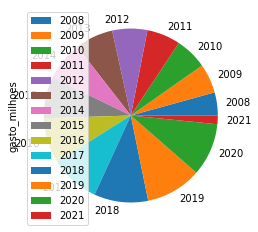

In [26]:
gastos_por_ano.plot(kind="pie", y="gasto_milhoes")

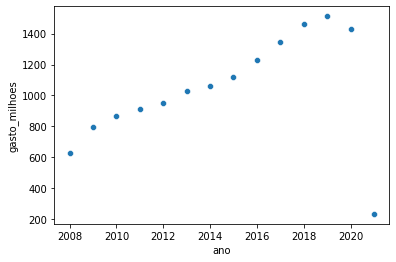

In [27]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index , y="gasto_milhoes" )
# plt.ylim(0)

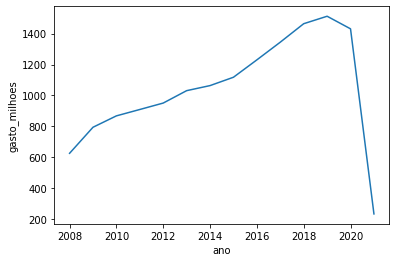

In [28]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index , y="gasto_milhoes" )

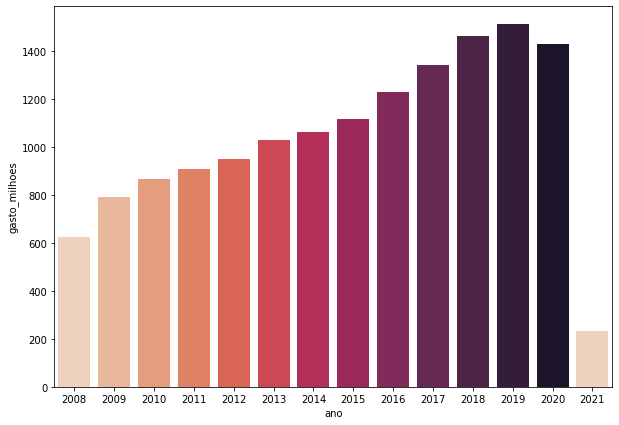

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index , y="gasto_milhoes", palette=sns.color_palette("rocket_r", 13)) 
# tom de cor ordenado pelo valor, o tom está variando de acordo com o ano (um informação que já temos)

In [30]:
estados = ["Paraná", "São Paulo", "Minas Gerais"]
estados_a_analisar = novo_mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
estados_a_analisar.head()

,uf,ano,gasto,gasto_milhoes,mes,gasto_diario,gasto_milhoes_diario
0,Minas Gerais,2008,894375233.11,894.38,77,29443856.36,29.44
1,Minas Gerais,2009,1149168433.67,1149.17,78,37768315.30,37.77
2,Minas Gerais,2010,1217516654.83,1217.52,78,40025839.54,40.03
3,Minas Gerais,2011,1315077772.94,1315.08,78,43244362.61,43.24
4,Minas Gerais,2012,1408435144.27,1408.44,78,46293376.07,46.29


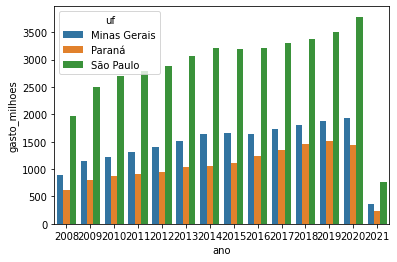

In [31]:
sns.barplot(data=estados_a_analisar, x="ano" , y="gasto_milhoes", hue="uf")

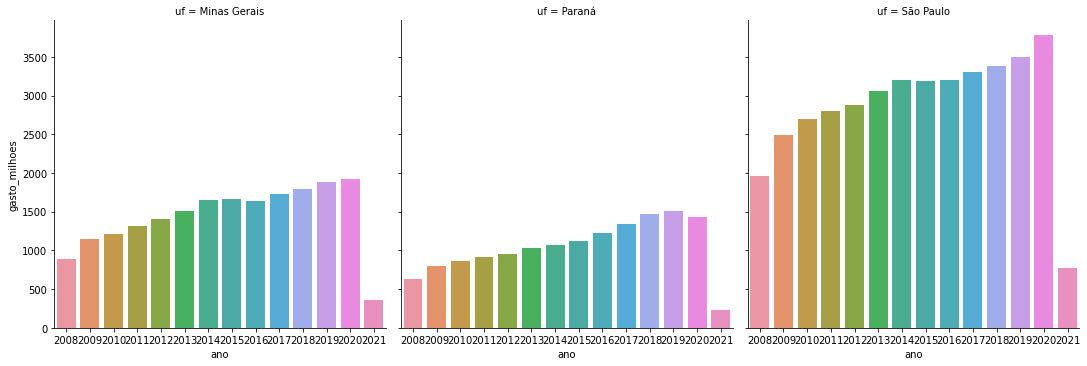

In [32]:
sns.catplot(data=estados_a_analisar, x="ano" , y="gasto_milhoes", kind="bar", col="uf")

##**Desafios**

Desafio 01: Reordenar as cores pelo valor do eixo y.

Desafio 02: Explorar a documentação do Seaborn.

Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.

#### **Desafio 01**

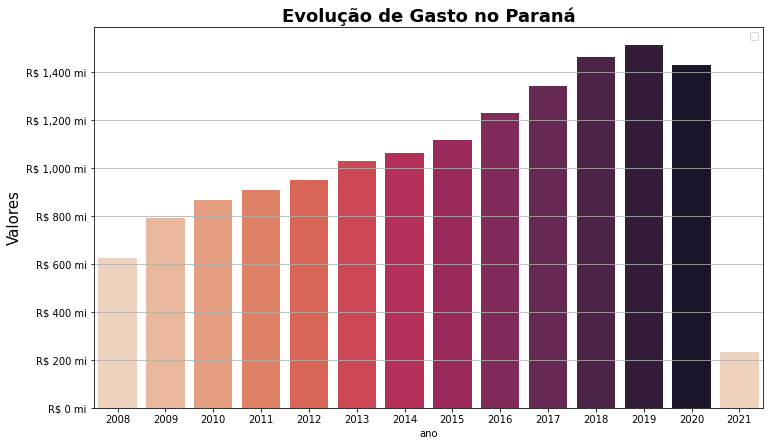

In [33]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index , y="gasto_milhoes", palette=sns.color_palette("rocket_r", 13))
plt.title('Evolução de Gasto no Paraná', fontsize=18, fontweight='bold', color='black')
ax.set_ylabel('Valores', fontsize=15, color='black')
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} mi'))
ax.legend('')
plt.show()

#### **Desafio 02**

Tutorial [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html) 

Todas as funcionalidades do Seaborn são acessíveis diretamente pelo nomes dos métodos, mas é estruturado de forma hierárquica, com módulos de funções que possuem mesmo objetivos de visualização por meios diferentes.

Relacionais (relplot)
Distribuições (displot)
Categóricos (catplot)

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" />

Além dos diferentes módulos, há uma classificação transversal nas funções do seaborn, que são:

**Axes-level**: Que plota os dados num único objeto *matplotlib.pyplot.Axes*, que é o valor de retorno das funções.

**Figure-level**: é uma interface com o matplotlib através dos objeto Seaborn, que gerencia uma figura, usualmente uma *FacetGrid*.


**histplot()** retorna um gráfico Axes-level, que é utilizado pelo **displot()** que é um gráfico figure-level do módulo "distributions".

#### **Desafio 03**

Vamos calcular o gasto per capita em 3 estados

In [34]:
# carregando os dados populacionais por ano
populacao_TCU_raw = pd.read_excel("https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/dados/estimativa_populacao_TCU_2001_a_2020.xls?raw=true")
populacao_TCU = populacao_TCU_raw.copy()
popMelt = populacao_TCU.melt(id_vars=["uf", "regiao"])
popMelt.rename(columns={'variable':'ano', 'value':'populacao'}, inplace=True)
popMelt.head()

,uf,regiao,ano,populacao
0,Rondônia,Região Norte,2001,1407886
1,Acre,Região Norte,2001,574355
2,Amazonas,Região Norte,2001,2900240
3,Roraima,Região Norte,2001,337237
4,Pará,Região Norte,2001,6341736


In [35]:
pop_estados_por_ano = popMelt.sort_values(['uf', 'ano']).query("uf in @estados").reset_index(drop=True)
pop_estados_por_ano.head()

,uf,regiao,ano,populacao
0,Minas Gerais,Região Sudeste,2001,18127096
1,Minas Gerais,Região Sudeste,2002,18343517
2,Minas Gerais,Região Sudeste,2003,18553312
3,Minas Gerais,Região Sudeste,2004,18993720
4,Minas Gerais,Região Sudeste,2005,19237450


In [36]:
gasto_populacao_merge = pd.merge( pop_estados_por_ano, estados_a_analisar, on=["uf", "ano"])
gasto_populacao_merge.head()

,uf,regiao,ano,populacao,gasto,gasto_milhoes,mes,gasto_diario,gasto_milhoes_diario
0,Minas Gerais,Região Sudeste,2008,19850072,894375233.11,894.38,77,29443856.36,29.44
1,Minas Gerais,Região Sudeste,2009,20033665,1149168433.67,1149.17,78,37768315.30,37.77
2,Minas Gerais,Região Sudeste,2010,19595309,1217516654.83,1217.52,78,40025839.54,40.03
3,Minas Gerais,Região Sudeste,2011,19728701,1315077772.94,1315.08,78,43244362.61,43.24
4,Minas Gerais,Região Sudeste,2012,19855332,1408435144.27,1408.44,78,46293376.07,46.29


In [37]:
gastos_por_ano_populacao = gasto_populacao_merge[["uf","regiao", "ano", "populacao", "gasto", "gasto_milhoes"]]
gastos_por_ano_populacao["gasto_per_capita"] = gastos_por_ano_populacao['gasto'] / gastos_por_ano_populacao['populacao']
gastos_por_ano_populacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uf,regiao,ano,populacao,gasto,gasto_milhoes,gasto_per_capita
0,Minas Gerais,Região Sudeste,2008,19850072,894375233.11,894.38,45.06
1,Minas Gerais,Região Sudeste,2009,20033665,1149168433.67,1149.17,57.36
2,Minas Gerais,Região Sudeste,2010,19595309,1217516654.83,1217.52,62.13
3,Minas Gerais,Região Sudeste,2011,19728701,1315077772.94,1315.08,66.66
4,Minas Gerais,Região Sudeste,2012,19855332,1408435144.27,1408.44,70.93


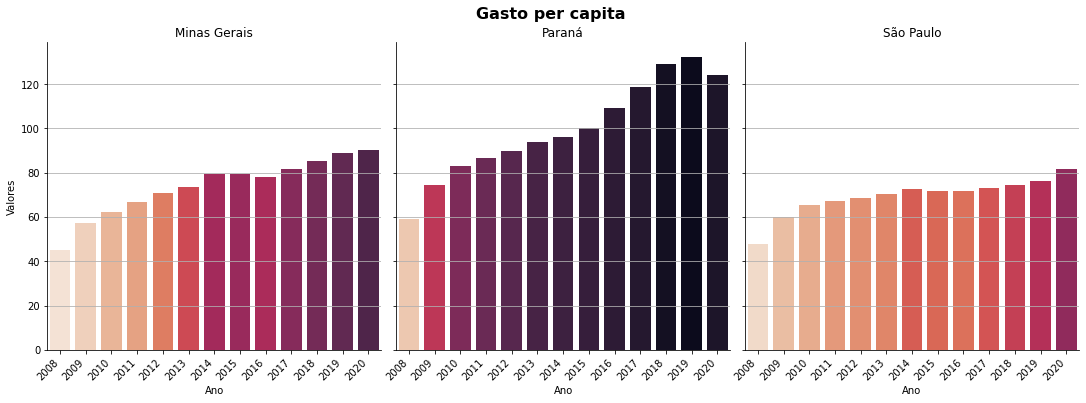

In [38]:
g = sns.catplot(data=gastos_por_ano_populacao, x='ano', y='gasto_per_capita', hue='gasto_per_capita',
            dodge=False, kind='bar', col='uf', palette='rocket_r', col_wrap=3, legend=False)

for c in g.axes:
  c.yaxis.grid(True)
  c.set_title(list(g.axes_dict.keys())[list(g.axes_dict.values()).index(c)]) # Utilizando o g.axes_dict para acessar cada nome de UF.

g.set_axis_labels('Ano','Valores')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Gasto per capita', fontsize=16, fontweight='bold', y=1.03, color='black')

plt.show()

#### **Desafio 04**

In [39]:
# Obter nova base de dados, quantidade de internações por ano por UF
mapa = {
    'Ano atendimento' : 'ano',
    'AC' : 'Acre',
    'AL' : 'Alagoas',
    'AP' : 'Amapá',
    'AM' : 'Amazonas',
    'BA' : 'Bahia',
    'CE' : 'Ceará',
    'DF' : 'Distrito Federal',
    'ES' : 'Espírito Santo',
    'GO' : 'Goiás',
    'MA' : 'Maranhão',
    'MT' : 'Mato Grosso',
    'MS' : 'Mato Grosso do Sul',
    'MG' : 'Minas Gerais',
    'PA' : 'Pará',
    'PB' : 'Paraíba',
    'PR' : 'Paraná',
    'PE' : 'Pernambuco',
    'PI' : 'Piauí',
    'RJ' : 'Rio de Janeiro',
    'RN' : 'Rio Grande do Norte',
    'RS' : 'Rio Grande do Sul',
    'RO' : 'Rondônia',
    'RR' : 'Roraima',
    'SC' : 'Santa Catarina',
    'SP' : 'São Paulo',
    'SE' : 'Sergipe',
    'TO' : 'Tocantins'
};

dados_internacoes_raw = pd.read_csv("https://raw.githubusercontent.com/hc0rd31r0/Bootcamp_Data_Science/main/dados/Internacoes_por_ano_porUF-A004344189_28_143_208.csv",
                    engine='python',
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",").drop("Total",axis=1)
dados_internacoes = dados_internacoes_raw.copy()
dados_internacoes.rename(columns=mapa, inplace=True)
dados_internacoes.head()

,ano,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,2007,2376,2187,13459,2035,37857,2760,6421,24664,12007,18737,10294,10973,35172,7565,5084,22319,72046,11472,29525,100043,45779,24844,44375,9979,11471,23122,16396
1,2008,73088,49010,165614,25560,507219,33113,98558,325629,225907,492674,161497,223310,491204,179536,99867,847075,1122740,183888,642573,2202033,735004,373379,719203,153622,174477,357921,184851
2,2009,96612,46359,155100,28860,528358,37333,100278,362117,238843,492035,166786,234216,497038,177656,92960,875609,1110909,191030,642807,2269176,764001,389299,729375,158431,177585,361816,185144
3,2010,100443,49778,161830,32827,528658,36458,103059,395304,233769,487049,172370,231920,515899,180977,93524,886578,1136979,195450,666324,2339758,784951,389198,722331,163411,180163,371237,186895
4,2011,97936,52112,164114,30057,509347,37081,108143,403392,225808,484909,169939,211973,526924,177668,92631,877757,1147267,210945,654034,2350477,752266,399482,710201,157599,174354,352880,187789


In [40]:
internacoesMelt = dados_internacoes.melt(id_vars=["ano"])
internacoesMelt.rename(columns={'variable':'uf', 'value':'internacoes'}, inplace=True)
internacoesMelt.head()

,ano,uf,internacoes
0,2007,Rondônia,2376
1,2008,Rondônia,73088
2,2009,Rondônia,96612
3,2010,Rondônia,100443
4,2011,Rondônia,97936


In [41]:
gasto_internacao_merge = pd.merge( internacoesMelt, estados_a_analisar, on=["uf", "ano"])
gasto_internacao_merge.head()


,ano,uf,internacoes,gasto,gasto_milhoes,mes,gasto_diario,gasto_milhoes_diario
0,2008,Minas Gerais,1122740,894375233.11,894.38,77,29443856.36,29.44
1,2009,Minas Gerais,1110909,1149168433.67,1149.17,78,37768315.30,37.77
2,2010,Minas Gerais,1136979,1217516654.83,1217.52,78,40025839.54,40.03
3,2011,Minas Gerais,1147267,1315077772.94,1315.08,78,43244362.61,43.24
4,2012,Minas Gerais,1164605,1408435144.27,1408.44,78,46293376.07,46.29


In [42]:
gastos_por_ano_internacao = gasto_internacao_merge[["uf", "ano", "internacoes", "gasto", "gasto_milhoes"]]
gastos_por_ano_internacao["gasto_por_internacao"] = gastos_por_ano_internacao['gasto'] / gastos_por_ano_internacao['internacoes']
gastos_por_ano_internacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uf,ano,internacoes,gasto,gasto_milhoes,gasto_por_internacao
0,Minas Gerais,2008,1122740,894375233.11,894.38,796.60
1,Minas Gerais,2009,1110909,1149168433.67,1149.17,1034.44
2,Minas Gerais,2010,1136979,1217516654.83,1217.52,1070.83
3,Minas Gerais,2011,1147267,1315077772.94,1315.08,1146.27
4,Minas Gerais,2012,1164605,1408435144.27,1408.44,1209.37


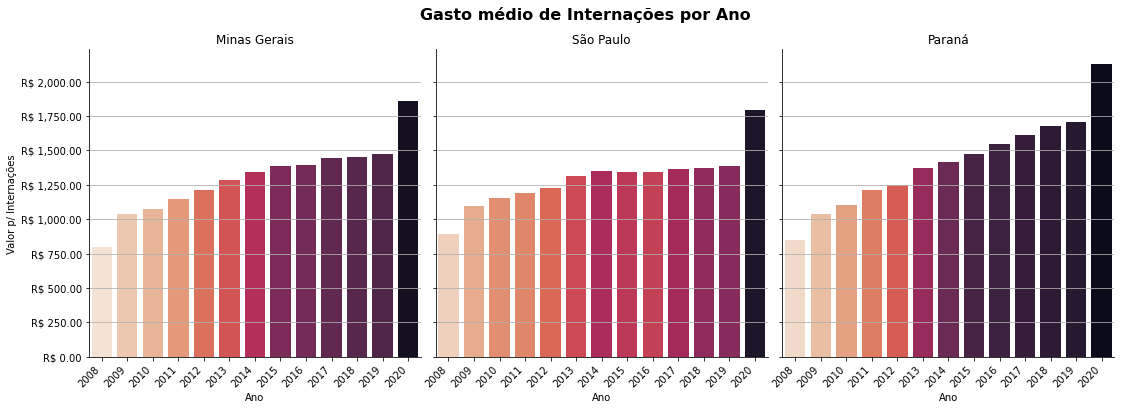

In [43]:
g = sns.catplot(data=gastos_por_ano_internacao, x='ano', y='gasto_por_internacao', hue='gasto_por_internacao',
            dodge=False, kind='bar', col='uf', palette='rocket_r', col_wrap=3, legend=False)
for c in g.axes:
  c.yaxis.grid(True)
  c.set_title(list(g.axes_dict.keys())[list(g.axes_dict.values()).index(c)]) # Utilizando o g.axes_dict para acessar cada nome de UF.

for ax in g.axes.flat:
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))

g.set_axis_labels('Ano','Valor p/ Internações')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Gasto médio de Internações por Ano', fontsize=16, fontweight='bold', y='1.05', color='black')

plt.show()

O que aprendemos nessa aula:

---

* Como usar o Groupby;
* Como alterar a Palete de cores do seu gráfico com seaborn;
* Como usar a Palete de cores para ajudar na interpretação dos gráficos;
* O que é e como usar o catplot para comparar categorias.